In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import random
import os
import sklearn
from sklearn.model_selection import train_test_split
from keras.applications import VGG16
from keras.applications import MobileNetV2
from keras import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.optimizers import Adam
from keras.models import load_model

In [12]:
emotions=['angry','disgust','fear','happy','neutral','sad','surprise']

In [13]:
model=load_model('Model (1).h5')

In [14]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 6, 6, 64)        

In [15]:
image=cv2.imread('happy1.jpg')

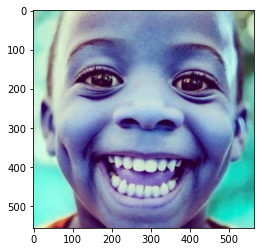

In [16]:
plt.imshow(image)

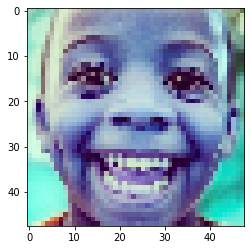

In [17]:
image=cv2.resize(image,(48,48))
plt.imshow(image)

In [18]:
image

array([[[157, 211, 182],
        [143, 212, 185],
        [119, 202, 177],
        ...,
        [149, 172, 134],
        [140, 166, 126],
        [ 99, 123,  79]],

       [[149, 205, 182],
        [122, 199, 171],
        [120, 205, 183],
        ...,
        [146, 168, 133],
        [124, 140,  97],
        [189, 214, 170]],

       [[135, 207, 185],
        [121, 208, 182],
        [154, 226, 196],
        ...,
        [103, 122,  97],
        [144, 163, 124],
        [197, 226, 185]],

       ...,

       [[ 93, 251, 228],
        [116, 251, 228],
        [131, 252, 231],
        ...,
        [ 69, 232, 212],
        [ 82, 235, 215],
        [ 89, 239, 219]],

       [[110, 249, 226],
        [127, 244, 221],
        [154, 243, 220],
        ...,
        [107, 229, 211],
        [108, 234, 215],
        [105, 239, 219]],

       [[145, 238, 213],
        [197, 243, 213],
        [231, 240, 197],
        ...,
        [131, 230, 211],
        [123, 232, 214],
        [123, 237, 218]]

In [19]:
image=np.resize(image,(1,48,48,3))
image=image/255.0
image

array([[[[0.61568627, 0.82745098, 0.71372549],
         [0.56078431, 0.83137255, 0.7254902 ],
         [0.46666667, 0.79215686, 0.69411765],
         ...,
         [0.58431373, 0.6745098 , 0.5254902 ],
         [0.54901961, 0.65098039, 0.49411765],
         [0.38823529, 0.48235294, 0.30980392]],

        [[0.58431373, 0.80392157, 0.71372549],
         [0.47843137, 0.78039216, 0.67058824],
         [0.47058824, 0.80392157, 0.71764706],
         ...,
         [0.57254902, 0.65882353, 0.52156863],
         [0.48627451, 0.54901961, 0.38039216],
         [0.74117647, 0.83921569, 0.66666667]],

        [[0.52941176, 0.81176471, 0.7254902 ],
         [0.4745098 , 0.81568627, 0.71372549],
         [0.60392157, 0.88627451, 0.76862745],
         ...,
         [0.40392157, 0.47843137, 0.38039216],
         [0.56470588, 0.63921569, 0.48627451],
         [0.77254902, 0.88627451, 0.7254902 ]],

        ...,

        [[0.36470588, 0.98431373, 0.89411765],
         [0.45490196, 0.98431373, 0.89411765]

In [20]:
model.predict(image)

1/1 [==============================] - 0s 120ms/step


array([[2.5103616e-06, 3.9813699e-09, 8.9657542e-06, 9.9805319e-01,
        4.6801835e-04, 1.4550940e-05, 1.4528562e-03]], dtype=float32)

In [21]:
prediction=np.argmax(model.predict(image))
prediction

1/1 [==============================] - 0s 17ms/step


3

In [22]:
def preprocess_img(img):
    img=cv2.resize(img,(48,48))
    img=np.resize(img,(1,48,48,3))
    img=img/255.0
    
    return img

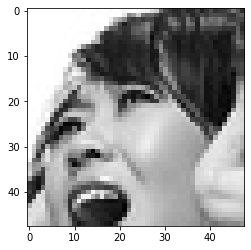

In [23]:
image_fear=cv2.imread('fear.jpg')
plt.imshow(image_fear)

In [24]:
image_fear=preprocess_img(image_fear)
image_fear

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.45490196, 0.45490196, 0.45490196],
         [0.34509804, 0.34509804, 0.34509804],
         [0.18431373, 0.18431373, 0.18431373]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.2       , 0.2       , 0.2       ],
         [0.3254902 , 0.3254902 , 0.3254902 ],
         [0.36862745, 0.36862745, 0.36862745]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.24313725, 0.24313725, 0.24313725],
         [0.29019608, 0.29019608, 0.29019608],
         [0.28627451, 0.28627451, 0.28627451]],

        ...,

        [[0.84705882, 0.84705882, 0.84705882],
         [0.87843137, 0.87843137, 0.87843137]

In [25]:
predict=model.predict(image_fear)
predict

1/1 [==============================] - 0s 22ms/step


array([[4.4451162e-01, 1.4118253e-03, 4.9752662e-01, 1.5991056e-02,
        2.8163503e-04, 9.5874788e-03, 3.0689836e-02]], dtype=float32)

In [26]:
np.argmax(model.predict(image_fear))

1/1 [==============================] - 0s 19ms/step


2

In [27]:
i=0
for label in emotions:
    print("\t%s = %.2f %%" % (label, predict[0][i] * 100))
    i = i + 1  

	angry = 44.45 %
	disgust = 0.14 %
	fear = 49.75 %
	happy = 1.60 %
	neutral = 0.03 %
	sad = 0.96 %
	surprise = 3.07 %


In [34]:
detect_face=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [35]:
def face_rect(img):
    new_img=img
    coords=detect_face.detectMultiScale(new_img)
    for x,y,w,h in coords:
         cv2.rectangle(new_img,(x,y),(x+w,y+h),(0,0,0),2)
    
    return new_img  

In [36]:
def crop_face(img):
    
    coords=detect_face.detectMultiScale(img)
    for x,y,w,h in coords:
         new_img=img[y:y+h,x:x+w]
    
    return new_img 

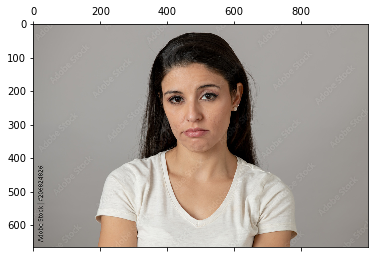

In [37]:
img_neutral=cv2.imread('neutral1.jpg')
img_neutral=cv2.cvtColor(img_neutral,cv2.COLOR_BGR2RGB)
plt.matshow(img_neutral)

In [38]:
prediction=model.predict(preprocess_img(img_neutral))
i=0
for label in emotions:
    print("\t%s = %.2f %%" % (label, prediction[0][i] * 100))
    i = i + 1 

1/1 [==============================] - 0s 15ms/step
	angry = 1.62 %
	disgust = 0.12 %
	fear = 1.05 %
	happy = 65.83 %
	neutral = 16.23 %
	sad = 14.80 %
	surprise = 0.35 %


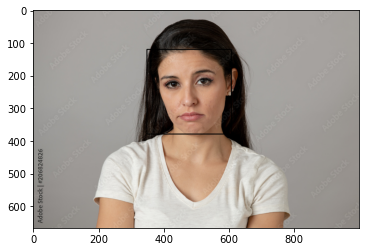

In [39]:
img_neutral_face_detect=face_rect(img_neutral)
plt.imshow(img_neutral_face_detect)

In [40]:
img_neutral_crop=crop_face(img_neutral)

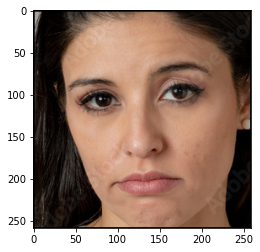

In [41]:
plt.imshow(img_neutral_crop)

In [42]:
img_neutral_crop.shape

(259, 259, 3)

In [43]:
pred1=model.predict(preprocess_img(img_neutral_crop))
i=0
for label in emotions:
    print("\t%s = %.2f %%" % (label, pred1[0][i] * 100))
    i = i + 1 

1/1 [==============================] - 0s 17ms/step
	angry = 1.26 %
	disgust = 0.02 %
	fear = 1.18 %
	happy = 0.76 %
	neutral = 87.80 %
	sad = 8.92 %
	surprise = 0.05 %
